세팅

In [130]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic' #sns 한글화
# https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False #searbon 마이너스 부호 살리기

데이터 불러오기

In [131]:
df = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/train.csv')
df_test = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/test.csv')
submission = pd.read_csv('C:/Users/prokj/Documents/GitHub/aiffel/8week/data/sample_submission.csv')

데이터 살펴보기

In [132]:
df.info() #각 칼럼의 상관관계를 분석해보자. object -> int 변환이 필수적이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [133]:
#'실제 식사 가능한 인원' 칼럼 추가
df['실제점심식사가능자수'] = df['본사정원수']-df['본사휴가자수']-df['본사출장자수']-df['현본사소속재택근무자수']

In [134]:
#칼럼 잘 추가 되었는지 확인
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,실제점심식사가능자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0


In [135]:
#조식, 중식, 석식 메뉴 삭제 (추후에 알아 보자)
인트만 = df.drop(labels= '조식메뉴', axis=1)
인트만 = 인트만.drop(labels= '중식메뉴', axis=1)
인트만 = 인트만.drop(labels= '석식메뉴', axis=1)

In [136]:
#일자와 요일이 object. 변환이 필요함.
인트만.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식계             1205 non-null   float64
 8   석식계             1205 non-null   float64
 9   실제점심식사가능자수      1205 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 94.3+ KB


In [137]:
#corr을 위해 일자를 int로 변환하자.
#인트 변환 전, datatime으로 변환
인트만['일자']= pd.to_datetime(인트만['일자'])

In [138]:
인트만.info() #datatime64 변환완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   중식계             1205 non-null   float64       
 8   석식계             1205 non-null   float64       
 9   실제점심식사가능자수      1205 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 94.3+ KB


In [139]:
# 연월일 칼럼 추가

인트만['연도'] = 인트만['일자'].dt.year
인트만['월'] = 인트만['일자'].dt.month
인트만['일'] = 인트만['일자'].dt.day

# https://bigdaheta.tistory.com/16

In [140]:
인트만 #일자는 이제 필요없다.

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2319.0,2021,1,20
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,2309.0,2021,1,21
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2177.0,2021,1,22
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,2396.0,2021,1,25


In [141]:
#일자 삭제
인트만 = 인트만.drop(['일자'], axis=1)
#이유는 모르겠으나 레이블을 안쓰고, 요런식으로 쓰니...

In [142]:
#일자가 잘 삭제되었다.
인트만

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
0,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,2016,2,1
1,화,2601,50,173,319,0.0,867.0,560.0,2378.0,2016,2,2
2,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,2016,2,3
3,목,2601,104,220,355,0.0,978.0,525.0,2277.0,2016,2,4
4,금,2601,278,181,34,0.0,925.0,330.0,2142.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,수,2983,75,198,4,391.0,1093.0,421.0,2319.0,2021,1,20
1201,목,2983,92,231,462,351.0,832.0,353.0,2309.0,2021,1,21
1202,금,2983,255,248,1,303.0,579.0,217.0,2177.0,2021,1,22
1203,월,2983,107,153,616,327.0,1145.0,502.0,2396.0,2021,1,25


In [143]:
#요일도 인트로 변환하자
weekday = {"월": 1, "화": 2, "수": 3, "목": 4, "금": 5}

인트만["요일"] = 인트만["요일"].map(weekday)


#아래는 레이블 인코딩으로 시도했던 기록.. 
# #레이블 인코딩 하면, 순서가 요일이 가나다 순서대로 정렬되어 인식이 어려움.
# 버림.
# # input_labels = ['월', '화','수', '목','금']

# cols = 인트만.select_dtypes(include='object').columns
# for col in cols:
#     le = LabelEncoder()
#     인트만[col] = le.fit_transform(인트만[col])

In [144]:
#요일도 숫자로 잘 변환되었다.
인트만

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
0,1,2601,50,150,238,0.0,1039.0,331.0,2401.0,2016,2,1
1,2,2601,50,173,319,0.0,867.0,560.0,2378.0,2016,2,2
2,3,2601,56,180,111,0.0,1017.0,573.0,2365.0,2016,2,3
3,4,2601,104,220,355,0.0,978.0,525.0,2277.0,2016,2,4
4,5,2601,278,181,34,0.0,925.0,330.0,2142.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,3,2983,75,198,4,391.0,1093.0,421.0,2319.0,2021,1,20
1201,4,2983,92,231,462,351.0,832.0,353.0,2309.0,2021,1,21
1202,5,2983,255,248,1,303.0,579.0,217.0,2177.0,2021,1,22
1203,1,2983,107,153,616,327.0,1145.0,502.0,2396.0,2021,1,25


In [145]:
#상관관계 분석(중식계 순으로 나열) 
인트만_sort = 인트만.corr()["중식계"].sort_values(ascending=False)
인트만_sort

#요일이 가장 중요

중식계               1.000000
본사시간외근무명령서승인건수    0.535611
석식계               0.508287
실제점심식사가능자수        0.286810
현본사소속재택근무자수       0.076509
연도               -0.078804
일                -0.097392
본사정원수            -0.115529
월                -0.154664
본사휴가자수           -0.391975
본사출장자수           -0.512680
요일               -0.731563
Name: 중식계, dtype: float64

In [146]:
#상관관계 분석(석식계 순으로 나열) 
인트만_sort = 인트만.corr()["석식계"].sort_values(ascending=False)
인트만_sort

#본사시간외근무명령서승인건수가 가장 중요

석식계               1.000000
본사시간외근무명령서승인건수    0.571168
중식계               0.508287
실제점심식사가능자수        0.172373
현본사소속재택근무자수      -0.057534
월                -0.127142
본사정원수            -0.173852
일                -0.185565
본사출장자수           -0.188164
연도               -0.194792
요일               -0.312112
본사휴가자수           -0.316894
Name: 석식계, dtype: float64

In [147]:
인트만중식기준정렬 = 인트만[['중식계','본사시간외근무명령서승인건수','석식계','실제점심식사가능자수','현본사소속재택근무자수','연도','일','본사정원수','월','본사휴가자수','본사출장자수','요일']]
인트만석식기준정렬 = 인트만[['석식계','본사시간외근무명령서승인건수','중식계','실제점심식사가능자수','현본사소속재택근무자수','월','본사정원수','일','본사출장자수','연도','요일','본사휴가자수']]

In [148]:
인트만중식기준정렬상관관계= 인트만중식기준정렬.corr()
인트만중식기준정렬상관관계

,중식계,본사시간외근무명령서승인건수,석식계,실제점심식사가능자수,현본사소속재택근무자수,연도,일,본사정원수,월,본사휴가자수,본사출장자수,요일
중식계,1.000000,0.535611,0.508287,0.286810,0.076509,-0.078804,-0.097392,-0.115529,-0.154664,-0.391975,-0.512680,-0.731563
본사시간외근무명령서승인건수,0.535611,1.000000,0.571168,0.309118,0.156792,0.181749,-0.093606,0.146544,0.018316,-0.230789,-0.308757,-0.554359
석식계,0.508287,0.571168,1.000000,0.172373,-0.057534,-0.194792,-0.185565,-0.173852,-0.127142,-0.316894,-0.188164,-0.312112
실제점심식사가능자수,0.286810,0.309118,0.172373,1.000000,-0.150393,0.306486,-0.028433,0.503771,0.006330,-0.552661,0.136389,-0.250092
현본사소속재택근무자수,0.076509,0.156792,-0.057534,-0.150393,1.000000,0.571133,-0.031583,0.452293,0.033586,0.065397,-0.352643,-0.026795
연도,-0.078804,0.181749,-0.194792,0.306486,0.571133,1.000000,-0.029843,0.764078,-0.092612,0.129875,-0.109583,-0.010725
일,-0.097392,-0.093606,-0.185565,-0.028433,-0.031583,-0.029843,1.000000,-0.020737,0.002120,-0.009210,0.144007,-0.002428
본사정원수,-0.115529,0.146544,-0.173852,0.503771,0.452293,0.764078,-0.020737,1.000000,0.244705,0.244666,-0.061688,-0.008577
월,-0.154664,0.018316,-0.127142,0.006330,0.033586,-0.092612,0.002120,0.244705,1.000000,0.193627,0.210877,0.002540
본사휴가자수,-0.391975,-0.230789,-0.316894,-0.552661,0.065397,0.129875,-0.009210,0.244666,0.193627,1.000000,-0.273318,0.155578


In [149]:
인트만석식기준정렬상관관계= 인트만석식기준정렬.corr()
인트만석식기준정렬상관관계

,석식계,본사시간외근무명령서승인건수,중식계,실제점심식사가능자수,현본사소속재택근무자수,월,본사정원수,일,본사출장자수,연도,요일,본사휴가자수
석식계,1.000000,0.571168,0.508287,0.172373,-0.057534,-0.127142,-0.173852,-0.185565,-0.188164,-0.194792,-0.312112,-0.316894
본사시간외근무명령서승인건수,0.571168,1.000000,0.535611,0.309118,0.156792,0.018316,0.146544,-0.093606,-0.308757,0.181749,-0.554359,-0.230789
중식계,0.508287,0.535611,1.000000,0.286810,0.076509,-0.154664,-0.115529,-0.097392,-0.512680,-0.078804,-0.731563,-0.391975
실제점심식사가능자수,0.172373,0.309118,0.286810,1.000000,-0.150393,0.006330,0.503771,-0.028433,0.136389,0.306486,-0.250092,-0.552661
현본사소속재택근무자수,-0.057534,0.156792,0.076509,-0.150393,1.000000,0.033586,0.452293,-0.031583,-0.352643,0.571133,-0.026795,0.065397
월,-0.127142,0.018316,-0.154664,0.006330,0.033586,1.000000,0.244705,0.002120,0.210877,-0.092612,0.002540,0.193627
본사정원수,-0.173852,0.146544,-0.115529,0.503771,0.452293,0.244705,1.000000,-0.020737,-0.061688,0.764078,-0.008577,0.244666
일,-0.185565,-0.093606,-0.097392,-0.028433,-0.031583,0.002120,-0.020737,1.000000,0.144007,-0.029843,-0.002428,-0.009210
본사출장자수,-0.188164,-0.308757,-0.512680,0.136389,-0.352643,0.210877,-0.061688,0.144007,1.000000,-0.109583,0.532962,-0.273318
연도,-0.194792,0.181749,-0.078804,0.306486,0.571133,-0.092612,0.764078,-0.029843,-0.109583,1.000000,-0.010725,0.129875


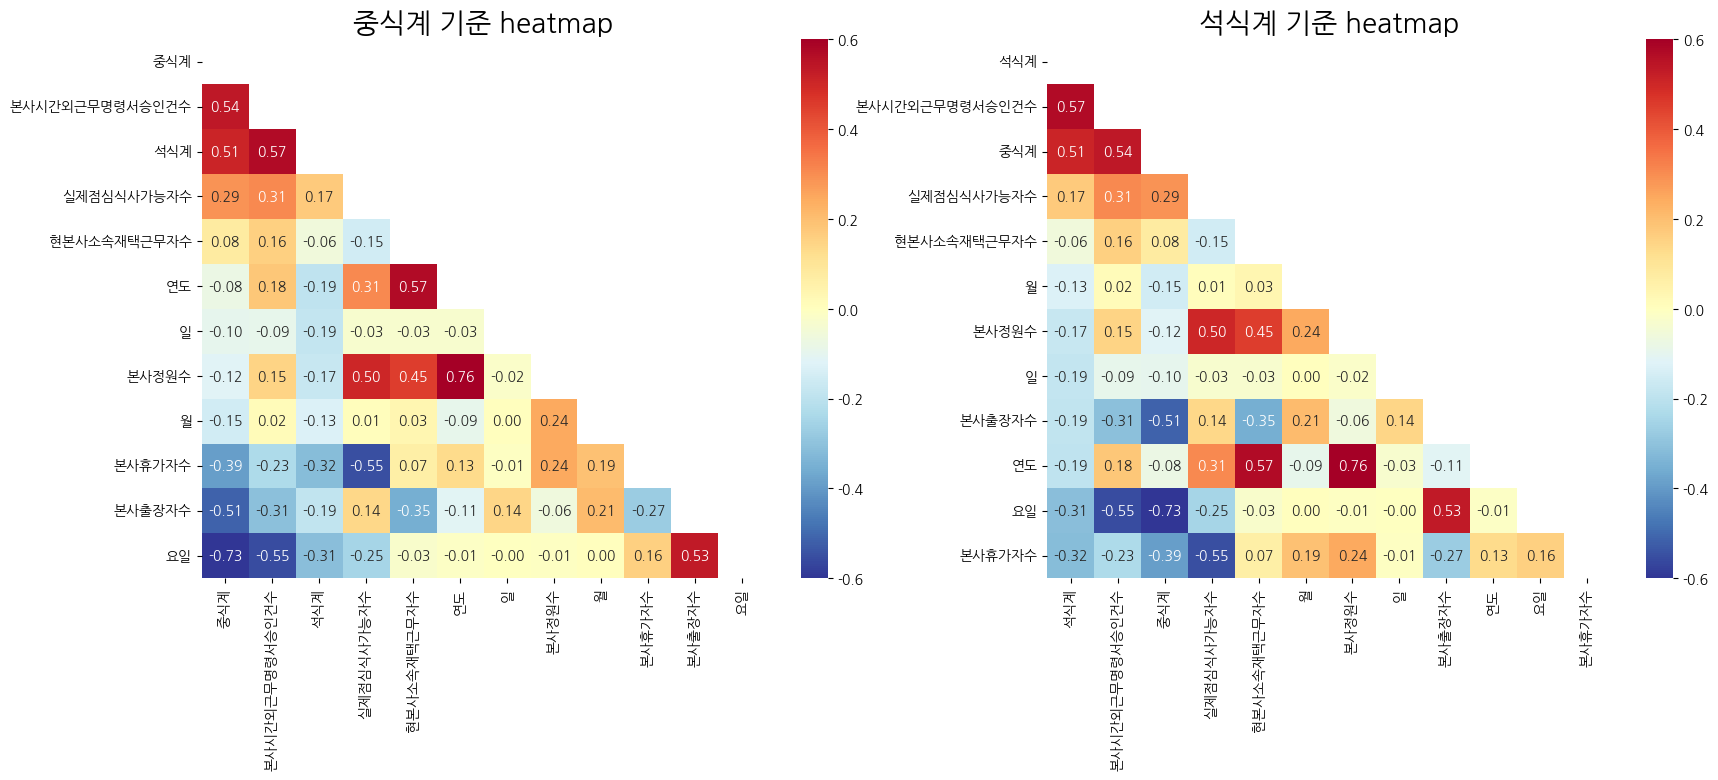

In [150]:
plt.figure(figsize=(20,7))


plt.subplot(1, 2, 1)
mask=np.zeros_like(인트만중식기준정렬상관관계,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.title('중식계 기준 heatmap', fontsize=20)
sns.heatmap(인트만중식기준정렬상관관계, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               fmt='.2f',
               vmin = -0.6, vmax = 0.6, #컬러차트 범위 지정
               mask=mask, #절반만 표시
              )

plt.subplot(1, 2, 2)
mask=np.zeros_like(인트만석식기준정렬상관관계,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.title('석식계 기준 heatmap', fontsize=20)
sns.heatmap(인트만석식기준정렬상관관계, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               fmt='.2f',
               vmin = -0.6, vmax = 0.6, #컬러차트 범위 지정
               mask=mask #절반만 표시
              )


# plt.update_layout(autorange="reversed")
plt.show() 

# 양의 상관관계
# 석식 - 근무명령서 승인건수 = 0.57
# 중식 - 석식= 0.51
# 요일 - 중식 = 0.58
# 중식 - 근무명령서 승인건수 = 0.54

# 음의 상관관계
# 본사출장자수 - 중식 = -0.51
# 본사휴가자수 - 중식 = 0.39

# 본사 정원수 - 현본사재택근무자수 = 0.57
# 본사 정원수 - 연도 = 0.76

In [151]:
# sns.pairplot(인트만, hue='중식계', palette='husl')
# sns.pairplot(인트만, hue='석식계', palette='husl')

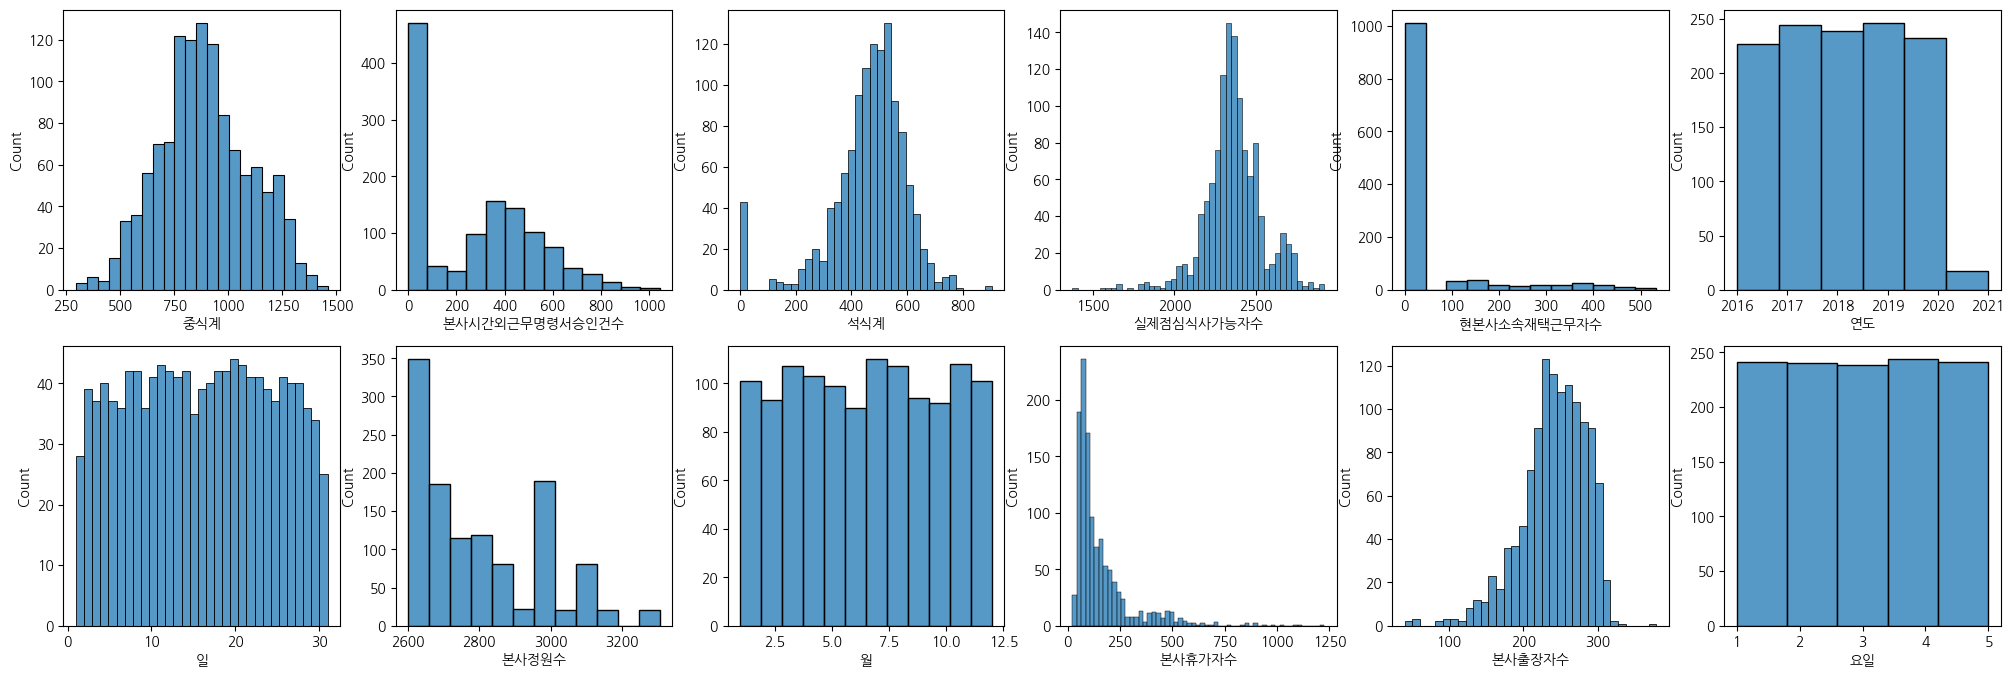

In [152]:
plt.figure(figsize=(25,8))
plt.subplot(2, 6, 1)
sns.histplot(인트만['중식계'])

plt.subplot(2, 6, 2)
sns.histplot(인트만['본사시간외근무명령서승인건수'])

plt.subplot(2, 6, 3)
sns.histplot(인트만['석식계'])

plt.subplot(2, 6, 4)
sns.histplot(인트만['실제점심식사가능자수'])

plt.subplot(2, 6, 5)
sns.histplot(인트만['현본사소속재택근무자수'])

plt.subplot(2, 6, 6)
sns.histplot(인트만['연도'], bins=6)

plt.subplot(2, 6, 7)
sns.histplot(인트만['일'], bins=31)

plt.subplot(2, 6, 8)
sns.histplot(인트만['본사정원수'])

plt.subplot(2, 6, 9)
sns.histplot(인트만['월'], bins=12)

plt.subplot(2, 6, 10)
sns.histplot(인트만['본사휴가자수'])

plt.subplot(2, 6, 11)
sns.histplot(인트만['본사출장자수'])

plt.subplot(2, 6, 12)
sns.histplot(인트만['요일'], bins=5)

plt.show()

# 인트만중식기준정렬 = 인트만[['중식계','본사시간외근무명령서승인건수','석식계','실제점심식사가능자수','현본사소속재택근무자수','','','','','','','']]

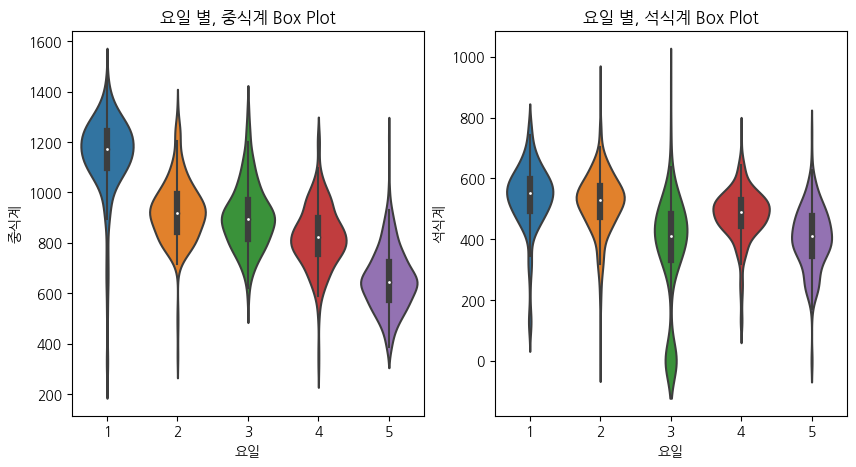

In [153]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.violinplot(x="요일", y="중식계", data=인트만)
plt.title("요일 별, 중식계 Box Plot")

plt.subplot(1, 2, 2)
sns.violinplot(x="요일", y="석식계", data=인트만)
plt.title("요일 별, 석식계 Box Plot")

plt.show()


In [154]:
# plt.figure(figsize=(5,5))


# sns.barplot(x="요일", y="중식계", data=인트만)
# plt.title("요일별 점심시간 수")
# plt.show()

# #레이블인코딩이 가나다 순서로 되어서 월화수목금이 01234 가 아니란 것을 깨달음.. ㅋㅋㅋㅋㅋㅋㅋ

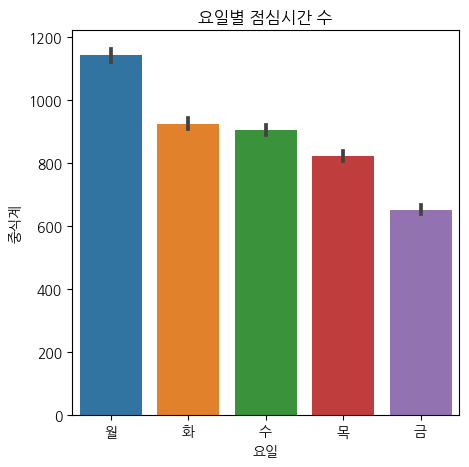

In [155]:
plt.figure(figsize=(5,5))


sns.barplot(x="요일", y="중식계", data=df)
# sns.barplot(x="요일", y="중식계", data=df)
plt.title("요일별 점심시간 수")
plt.show()

#요일에 있는 중식계를 자동으로 평균내어주는 것인가.. 월요일은 한 개가 아니라 수십개의 월요일이 있거늘,. 어찌 하나의 막대로 탄생된단 말인가!

#barplot은 기본적으로 각 범주에 대응하는 수치형 데이터가 2개 이상이라면 평균을 막대 그래프로 그려줍니다.

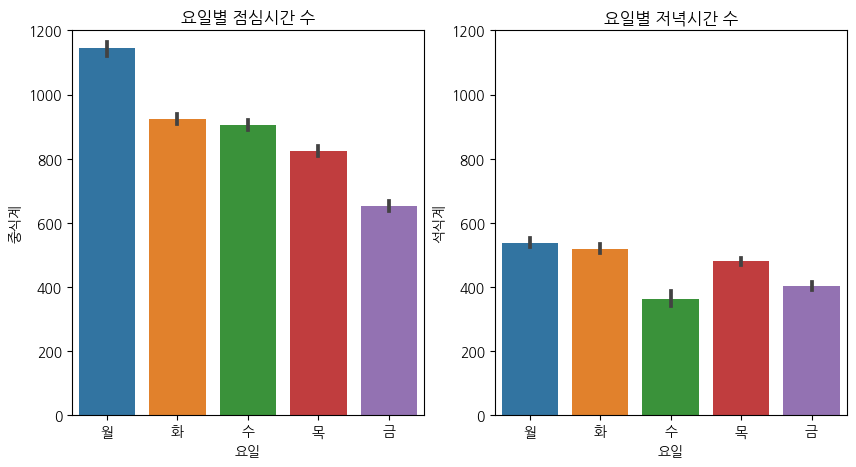

In [156]:
# x123123 = np.linspace(0.0, 4.0)
# x2 = np.linspace(0.0, 4.0)
# y = np.linspace(0.0, 1200.0)
# y2 = np.linspace(0.0, 1200.0)

# fig, ax = plt.subplots()
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.ylim((0,1200))
sns.barplot(x="요일", y="중식계", data=df)
# ax.set_ylim(0, 1200)
plt.title("요일별 점심시간 수")

plt.subplot(1, 2, 2)
plt.ylim((0,1200))
sns.barplot(x="요일", y="석식계" , data=df)
plt.title("요일별 저녁시간 수")


plt.show()



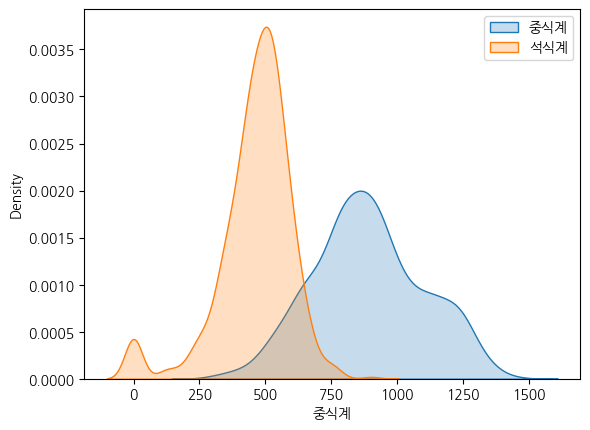

In [157]:
sns.kdeplot(df['중식계'], label='중식계', shade=True)
sns.kdeplot(df['석식계'], label='석식계',shade=True)
plt.legend()
plt.show()

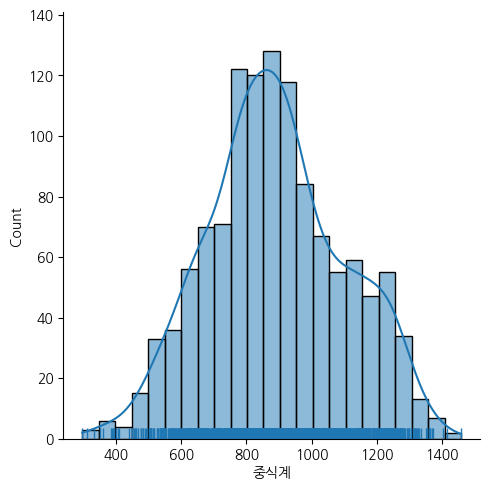

In [158]:
sns.displot(data=df['중식계'], kde=True, rug=True) #rug = 개수 시각화, kde=라인여부 #x-중식계,y-일수

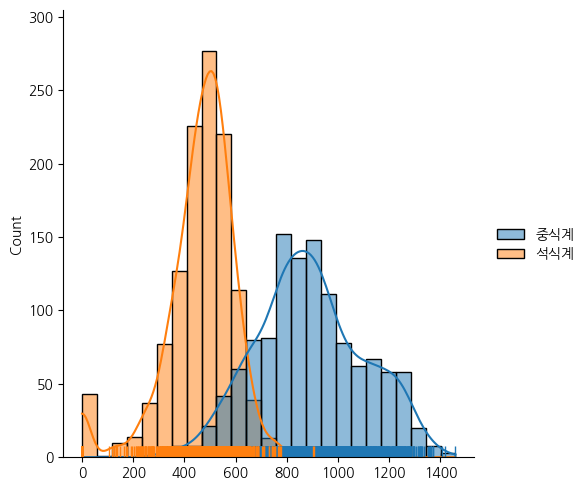

In [159]:
sns.displot(data=df[['중식계', '석식계']], kde=True, rug=True)
# sns.displot(data=df['석식계'], kde=True, color='blue') 

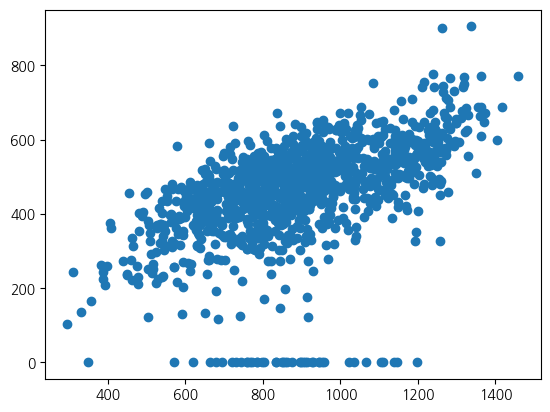

In [160]:
plt.scatter(df['중식계'],df['석식계'])

plt.show()

In [161]:
석식없는날 = 인트만.loc[df['석식계'] == 0, :]
석식없는날수요일만 = 석식없는날.loc[석식없는날['요일'] == 2, :]
석식없는날수요일만

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,실제점심식사가능자수,연도,월,일
955,2,3111,709,149,22,0.0,349.0,0.0,2253.0,2019,12,31


In [162]:
석식칼럼도없는날수요일만 = 석식없는날수요일만.drop(['석식계'], axis=1)

In [163]:
# co_only_no_dinner = 석식칼럼도없는날수요일만.corr()
# 석식칼럼도없는날수요일만

In [164]:
# sns.clustermap(co_only_no_dinner, 
#                annot = True,      # 실제 값 화면에 나타내기
#                cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
#                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
#               )

# ValueError: The condensed distance matrix must contain only finite values.
# 석식의 값이 모두 0이라 상관관계를 그릴 수 없는 것이었다!!
# 석식 줄을 지워보자.

<Figure size 1000x500 with 0 Axes>

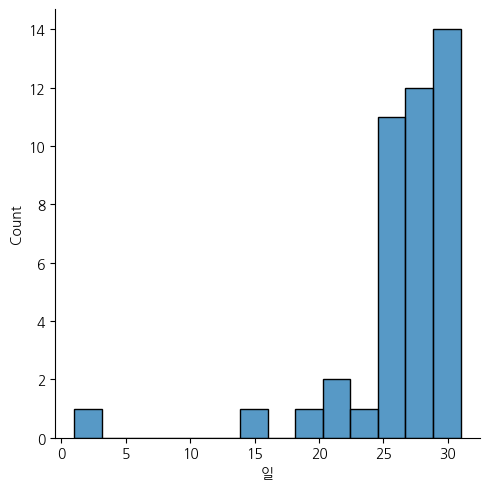

In [165]:
plt.figure(figsize=(10,5))
sns.displot(data=석식없는날['일'], kde=False)
plt.show()

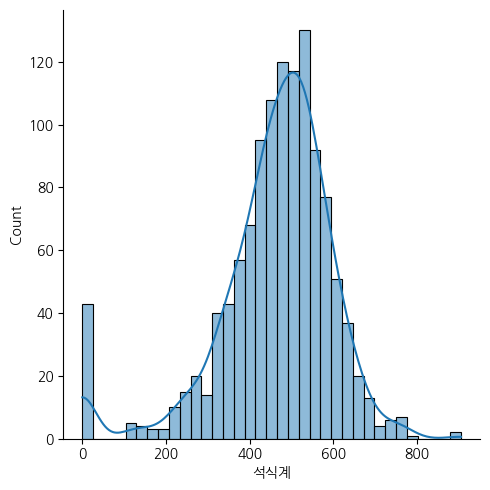

In [166]:
sns.displot(data=df['석식계'], kde=True)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
 12  실제점심식사가능자수      1205 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 122.5+ KB


In [168]:
df['본사휴가자수']

0        50
1        50
2        56
3       104
4       278
       ... 
1200     75
1201     92
1202    255
1203    107
1204     69
Name: 본사휴가자수, Length: 1205, dtype: int64

NameError: name 'x_train' is not defined

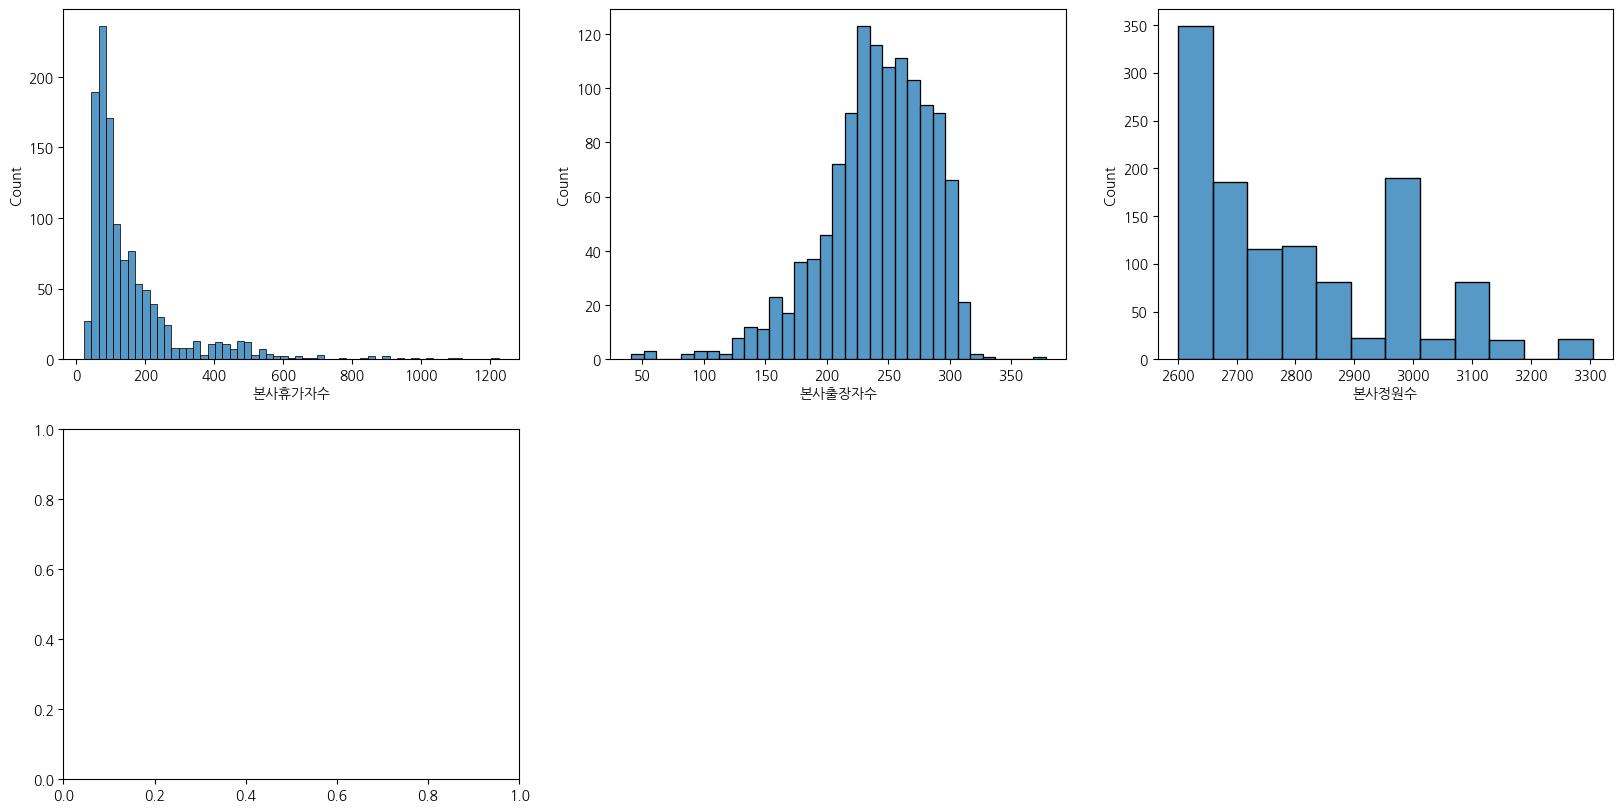

In [169]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.histplot(df['본사휴가자수'])

plt.subplot(2, 3, 2)
sns.histplot(df['본사출장자수'])

plt.subplot(2, 3, 3)
sns.histplot(df['본사정원수'])

plt.subplot(2, 3, 4)
sns.histplot(x_train['본사휴가자수'])

plt.subplot(2, 3, 5)
sns.histplot(x_train['본사출장자수'])

plt.subplot(2, 3, 6)
sns.histplot(x_train['본사정원수'])

In [ ]:
인트만2 = 인트만.loc[df['석식계'] != 0, :]
인트만2 

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일
0,3,2601,50,150,238,0.0,1039.0,331.0,2016,2,1
1,4,2601,50,173,319,0.0,867.0,560.0,2016,2,2
2,2,2601,56,180,111,0.0,1017.0,573.0,2016,2,3
3,1,2601,104,220,355,0.0,978.0,525.0,2016,2,4
4,0,2601,278,181,34,0.0,925.0,330.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...
1200,2,2983,75,198,4,391.0,1093.0,421.0,2021,1,20
1201,1,2983,92,231,462,351.0,832.0,353.0,2021,1,21
1202,0,2983,255,248,1,303.0,579.0,217.0,2021,1,22
1203,3,2983,107,153,616,327.0,1145.0,502.0,2021,1,25


In [ ]:
# train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
# test['요일'] = test['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

In [ ]:
인트만2 = 인트만2.reset_index(drop=True)

In [ ]:
x_train = 인트만2.drop(['중식계', '석식계'],axis=1 )
y1_train = 인트만2['중식계']
y2_train = 인트만2['석식계']

In [ ]:
x_train

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,연도,월,일
0,3,2601,50,150,238,0.0,2016,2,1
1,4,2601,50,173,319,0.0,2016,2,2
2,2,2601,56,180,111,0.0,2016,2,3
3,1,2601,104,220,355,0.0,2016,2,4
4,0,2601,278,181,34,0.0,2016,2,5
...,...,...,...,...,...,...,...,...,...
1157,2,2983,75,198,4,391.0,2021,1,20
1158,1,2983,92,231,462,351.0,2021,1,21
1159,0,2983,255,248,1,303.0,2021,1,22
1160,3,2983,107,153,616,327.0,2021,1,25


In [ ]:
x_train['본사휴가자수'] = np.log(x_train['본사휴가자수'])
x_train['본사정원수'] = np.log(x_train['본사정원수'])
x_train['본사출장자수'] = np.log(x_train['본사출장자수'])
# x_train['본사시간외근무명령서승인건수'] = np.log(x_train['본사시간외근무명령서승인건수'])
# x_train['현본사소속재택근무자수'] = np.log(x_train['현본사소속재택근무자수'])
x_train

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,연도,월,일
0,3,7.863651,3.912023,5.010635,238,0.0,2016,2,1
1,4,7.863651,3.912023,5.153292,319,0.0,2016,2,2
2,2,7.863651,4.025352,5.192957,111,0.0,2016,2,3
3,1,7.863651,4.644391,5.393628,355,0.0,2016,2,4
4,0,7.863651,5.627621,5.198497,34,0.0,2016,2,5
...,...,...,...,...,...,...,...,...,...
1157,2,8.000685,4.317488,5.288267,4,391.0,2021,1,20
1158,1,8.000685,4.521789,5.442418,462,351.0,2021,1,21
1159,0,8.000685,5.541264,5.513429,1,303.0,2021,1,22
1160,3,8.000685,4.672829,5.030438,616,327.0,2021,1,25


In [ ]:
y1_train

0       1039.0
1        867.0
2       1017.0
3        978.0
4        925.0
         ...  
1157    1093.0
1158     832.0
1159     579.0
1160    1145.0
1161    1015.0
Name: 중식계, Length: 1162, dtype: float64

In [ ]:
y2_train

0       331.0
1       560.0
2       573.0
3       525.0
4       330.0
        ...  
1157    421.0
1158    353.0
1159    217.0
1160    502.0
1161    480.0
Name: 석식계, Length: 1162, dtype: float64

In [ ]:
df_test = df_test.drop(labels= '조식메뉴', axis=1)
df_test = df_test.drop(labels= '중식메뉴', axis=1)
df_test = df_test.drop(labels= '석식메뉴', axis=1)

df_test['일자']= pd.to_datetime(df_test['일자'])
df_test['연도'] = df_test['일자'].dt.year
df_test['월'] = df_test['일자'].dt.month
df_test['일'] = df_test['일자'].dt.day
df_test = df_test.drop(['일자'], axis=1)

cols = df_test.select_dtypes(include='object').columns
for col in cols:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])


In [ ]:
df_test

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,연도,월,일
0,2,2983,88,182,5,358.0,2021,1,27
1,1,2983,104,212,409,348.0,2021,1,28
2,0,2983,270,249,0,294.0,2021,1,29
3,3,2924,108,154,538,322.0,2021,2,1
4,4,2924,62,186,455,314.0,2021,2,2
5,2,2924,59,199,5,286.0,2021,2,3
6,1,2924,61,211,476,288.0,2021,2,4
7,0,2924,169,252,0,256.0,2021,2,5
8,3,2924,88,174,690,329.0,2021,2,8
9,4,2924,94,183,542,329.0,2021,2,9


In [ ]:
x_test = df_test

In [ ]:
x_test['본사휴가자수'] = np.log(x_test['본사휴가자수'])
x_test['본사정원수'] = np.log(x_test['본사정원수'])
x_test['본사출장자수'] = np.log(x_test['본사출장자수'])
# x_test['본사시간외근무명령서승인건수'] = np.log(x_test['본사시간외근무명령서승인건수'])
# x_test['현본사소속재택근무자수'] = np.log(x_test['현본사소속재택근무자수'])
x_test

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,연도,월,일
0,2,8.000685,4.477337,5.204007,5,358.0,2021,1,27
1,1,8.000685,4.644391,5.356586,409,348.0,2021,1,28
2,0,8.000685,5.598422,5.517453,0,294.0,2021,1,29
3,3,7.980708,4.682131,5.036953,538,322.0,2021,2,1
4,4,7.980708,4.127134,5.225747,455,314.0,2021,2,2
5,2,7.980708,4.077537,5.293305,5,286.0,2021,2,3
6,1,7.980708,4.110874,5.351858,476,288.0,2021,2,4
7,0,7.980708,5.129899,5.529429,0,256.0,2021,2,5
8,3,7.980708,4.477337,5.159055,690,329.0,2021,2,8
9,4,7.980708,4.543295,5.209486,542,329.0,2021,2,9


In [ ]:
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model1.fit(x_train, y1_train)
model2.fit(x_train, y2_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

In [ ]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [ ]:
submission.to_csv('baseline.csv', index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
lgb = LGBMClassifier()
gbm = GradientBoostingClassifier()


lreg = LogisticRegression()

In [ ]:
# 최적의 파라미터 값 찾아보기
from sklearn.model_selection import GridSearchCV
# XGB
param_xgb = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [200,300,500,1000]
              }    
# LGB                        
param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth" : [25, 50, 75],
             "num_leaves" : [100,300,500,900,1200],
             "n_estimators" : [100, 200, 300,500,800,1000],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5]
              }
# GBM              
param_gbm = {"max_depth" : [4,5,6,7,8,9,10],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "n_estimators" : [100,200,300,500]
              }

# Logistic
param_lreg = { 'C' : [1.0, 3, 5, 7, 10],
              'max_iter': [50, 200, 100, 300, 500,700, 800]
              }

In [ ]:
x_train

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,연도,월,일
0,3,7.863651,3.912023,5.010635,238,0.0,2016,2,1
1,4,7.863651,3.912023,5.153292,319,0.0,2016,2,2
2,2,7.863651,4.025352,5.192957,111,0.0,2016,2,3
3,1,7.863651,4.644391,5.393628,355,0.0,2016,2,4
4,0,7.863651,5.627621,5.198497,34,0.0,2016,2,5
...,...,...,...,...,...,...,...,...,...
1157,2,8.000685,4.317488,5.288267,4,391.0,2021,1,20
1158,1,8.000685,4.521789,5.442418,462,351.0,2021,1,21
1159,0,8.000685,5.541264,5.513429,1,303.0,2021,1,22
1160,3,8.000685,4.672829,5.030438,616,327.0,2021,1,25


In [ ]:
y1_train

0       1039.0
1        867.0
2       1017.0
3        978.0
4        925.0
         ...  
1157    1093.0
1158     832.0
1159     579.0
1160    1145.0
1161    1015.0
Name: 중식계, Length: 1162, dtype: float64

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_train, y1_train, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}


# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.006455,1,0.006452,0.009677,0.003236
1,"{'max_depth': 1, 'min_samples_split': 3}",0.006455,1,0.006452,0.009677,0.003236
2,"{'max_depth': 2, 'min_samples_split': 2}",0.003229,3,0.003226,0.003226,0.003236
3,"{'max_depth': 2, 'min_samples_split': 3}",0.003229,3,0.003226,0.003226,0.003236
4,"{'max_depth': 3, 'min_samples_split': 2}",0.003226,5,0.003226,0.006452,0.000000
5,"{'max_depth': 3, 'min_samples_split': 3}",0.003226,5,0.003226,0.006452,0.000000


In [ ]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [ ]:
# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [ ]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor()

xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample =0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

7814.334298769903

In [ ]:
#  Randomized Search
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [ ]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.07}

In [ ]:
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 5,
    n_estimators = 200,
    subsample =0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

7118.972056445841

In [ ]:
# from sklearn.metrics import accuracy_score

# rf_clf = RandomForestClassifier(random_state=0)
# rf_clf.fit(X_train, y_train)
# pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test, pred)
# print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

In [ ]:
# rf_clf1 = RandomForestClassifier(n_estimators = 200, 
#                                 max_depth = 3,
#                                 min_samples_leaf = 8,
#                                 min_samples_split = 8,
#                                 random_state = 0,
#                                 n_jobs = -1)
# rf_clf1.fit(X_train, y_train)
# pred = rf_clf1.predict(X_test)
# print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_train, y_train)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# xgb = XGBRegressor(
#     min_samples_split = 8,
#     max_depth = 8,
#     n_estimators = 10,
#     min_samples_leaf =18
# )
# xgb.fit(X_train, y_train)
# pred = xgb.predict(X_test)
# mean_squared_error(y_test, pred)

In [ ]:
#제출용 데이터를 만들어보자 y1

# {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
# {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05} y1

xgb = XGBRegressor(
    subsample = 0.7,
    max_depth = 3,
    n_estimators = 200,
    learning_rate =0.05
)
xgb.fit(x_train, y1_train)
pred1 = xgb.predict(x_test)
# mean_squared_error(y_test, pred)

In [ ]:
pred1

array([ 998.0164 ,  899.71423,  592.8688 , 1237.9343 , 1007.762  ,
        972.6333 ,  923.4585 ,  670.2202 , 1240.699  , 1041.5931 ,
        824.64557, 1286.5171 , 1115.9751 , 1037.6362 ,  846.60535,
        637.6194 , 1234.3716 , 1039.12   ,  866.8208 ,  812.6663 ,
        559.25256, 1096.5802 ,  993.6706 ,  931.69324,  666.1444 ,
       1338.5007 , 1212.6426 , 1020.3457 ,  924.37854,  709.58215,
       1293.5459 , 1045.4554 , 1022.3458 ,  903.7123 ,  637.02136,
       1246.5256 ,  996.8549 ,  883.2612 ,  807.59607,  584.54236,
       1214.491  , 1022.0928 ,  955.4192 ,  802.61694,  595.42456,
       1222.1338 , 1041.1923 ,  965.8661 ,  870.7433 ,  597.2218 ],
      dtype=float32)

In [ ]:
# {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.07}
# {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
# {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
# {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.07} y2

xgb = XGBRegressor(
    subsample = 0.9,
    max_depth = 3,
    n_estimators = 200,
    learning_rate = 0.07
)
xgb.fit(x_train, y2_train)
pred2 = xgb.predict(x_test)
# mean_squared_error(y_test, pred)

In [ ]:
pred2

array([370.17722, 391.4962 , 246.11621, 555.5019 , 490.60043, 434.3008 ,
       483.31393, 378.4522 , 617.4655 , 532.53217, 241.41904, 704.99274,
       626.41254, 434.8409 , 504.38815, 365.14557, 676.8436 , 649.0773 ,
       381.63138, 492.50027, 291.0018 , 652.95154, 439.5941 , 527.11786,
       376.73703, 698.77734, 693.3737 , 433.14404, 508.64374, 329.13596,
       676.3137 , 532.97864, 426.0318 , 455.55588, 315.2155 , 610.2438 ,
       559.46405, 381.78067, 416.05124, 284.45367, 605.0853 , 567.9938 ,
       393.02762, 403.59497, 262.9687 , 588.16583, 552.05396, 378.81943,
       441.69162, 276.55215], dtype=float32)

In [ ]:
# ftr_importances_values = rf_clf1.feature_importances_
# ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# ftr_top_ascending = ftr_importances.sort_values(ascending=False)

# plt.figure(figsize=(4,3))
# plt.title('Top 20 Feature Importances')
# sns.barplot(x=ftr_top_ascending, y=ftr_top_ascending.index)
# plt.show()

In [ ]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [ ]:
submission.to_csv('baseline.csv', index=False)

2차 마무리